# NACA library data wrangling

In [11]:
from datetime import datetime
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import pprint
pp = pprint.PrettyPrinter(indent=0)
import matplotlib.pyplot as plt


In [12]:
# function to clean up records for new final data set

def mylistHelper(record,recordtype):
    title = [];
    title2 = [];
    flag = 1;
    more = [];
    
    # Handling or dict variables
    if (type(record) is dict):
        title = list(record.values())
        if (recordtype == 'creator') or (recordtype == 'contr') or (recordtype == 'id_repno'):
            more.append(title[1])
        return title[1], more
    
    
    # https://..., url: http:..., rep-no (2), casi:
    elif (recordtype == 'id_url'):
        for k in record:
            if k['__text'].startswith('url:'):
                title = k['__text'][5:]
        return title
    elif (recordtype == 'id_https'):
        for k in record:
            if k['__text'].startswith('https://'):
                title = k['__text']
        return title
    elif (recordtype == 'id_casi'):
        for k in record:
            if k['__text'].startswith('casi:'):
                title = k['__text'][6:]
        return title
    elif (recordtype == 'id_repno'):
        more = [];
        for k in record:
            if k['__text'].startswith('rep-no:') and flag:
                title = k['__text'][8:]
                more.append(title)
                flag = 0
            elif k['__text'].startswith('rep-no:'):
                title2 = k['__text'][8:]
                more.append(title2)
        return title, more
    
    elif (recordtype == 'keywords'):
        for k in record:
            title.append(k['__text'])
        return title
    
    
    elif type(record) is list:
        title = record[0]['__text']
        for k in record:
            kk = k['__text']
            if (recordtype == 'title') and ('NACA' in kk):
                if ("note" in kk.lower()) or ("memorandum" in kk.lower()) or ("reports" in kk.lower()) or ("circulars" in kk.lower()) or ("bulletin" in kk.lower()) and (", special report" not in kk.lower()):
                    more.append(k['__text'])
            elif (recordtype == 'contr'):
                more.append(k['__text'])
            elif (recordtype == 'creator'):
                more.append(k['__text'])


        return title, more
    
def mydatehelper(mixdate):
    tempdate = str(mixdate)
    if tempdate == '1989?': 
        tempdate='1939'
    tempdate = str(tempdate).strip('~?}{')
    month =''
#     print(tempdate)
#     print('this is raw date: '+tempdate+' with length'+str(len(tempdate)))
    
    if len(tempdate) == 4:
        year = str(mixdate[0:4])
        month = '06'
    elif len(tempdate.strip(' -~?')) > 5:
        year = str(tempdate[0:4])
        month = str(tempdate[5:7])
#         print('reconstructed: '+year+' '+month)
#     print(year+'-'+month)
    return year+'-'+month
    

In [13]:
# Load the separate data files into one and consolidate

fullset = []
temprec = {}
# data = []
dummy = {}

for i in range(1,15):
#     print('File: ',i)
    with open('test_data_'+str(i)+'.txt',encoding="utf-8") as json_file:
        data = json.load(json_file)
#         print('File:',i,'Length',len(data['record']))
        for rec in data['record']:
#             fullset.append(rec)
#             print('--------------------')
#             print('file',i,rec['header']['identifier'])
            
            temprec = {}
#             print(mylistHelper(rec['metadata']['dc']['title']))
            temprec['title'],temprec['doctype'] = mylistHelper(rec['metadata']['dc']['title'],'title')
#             print(temprec['title'])
#             print(temprec['doctype'])


            if 'contributor' in rec['metadata']['dc']:
                temprec['contributor'],dummy = mylistHelper(rec['metadata']['dc']['contributor'],'contr')
#                 print(temprec['contributor'])
#                 print(dummy)

                
            if 'creator' in rec['metadata']['dc']:
                temprec['creator'],temprec['creat2'] = mylistHelper(rec['metadata']['dc']['creator'],'creator')
#                 print(temprec['creator'])
#                 print(temprec['creat2'])
                
            temprec['date'] = mydatehelper(rec['metadata']['dc']['date']['__text'])
            temprec['year'] = int(temprec['date'][:4])
#             print(temprec['date'])
#             print(temprec['year'])
            
            temprec['abstr'] = rec['metadata']['dc']['description']['__text']
#             print(temprec['abstr'])
            
            temprec['pp'] = rec['metadata']['dc']['format'][0]['__text'].split(' ')[0]
            temprec['pp'] = temprec['pp'].split('-')[0].strip('\[\],vxip.X')
            if temprec['pp'] == '': temprec['pp']=1
            temprec['pp'] = int(temprec['pp'])
#             print(temprec['pp'])
            
            temprec['id_hd'] = rec['header']['identifier'][15:]
#             print(temprec['id_hd'])
            
            temprec['id_url'] = mylistHelper(rec['metadata']['dc']['identifier'],'id_url')
#             print(temprec['id_url'])
        
            temprec['id_https'] = mylistHelper(rec['metadata']['dc']['identifier'],'id_https')
#             print(temprec['id_https'])
            
            temprec['id_casi'] = mylistHelper(rec['metadata']['dc']['identifier'],'id_casi')
#             print(temprec['id_casi'])
            
            temprec['id_repno'],temprec['id_repno2'] = mylistHelper(rec['metadata']['dc']['identifier'],'id_repno')
#             print(temprec['id_repno'])
#             print(temprec['id_repno2'])
            
            temprec['keywords'] = mylistHelper(rec['metadata']['dc']['subject'],'keywords')
#             print(temprec['keywords'])
            
            fullset.append(temprec)
            
# print(fullset[1]['header']['identifier'])
# print(fullset[1]['metadata']['dc']['title'][0]['__text'])
# print(fullset[1]['metadata']['dc']['title'][1]['__text'])
# print(fullset[1]['metadata']['dc']['title'][2]['__text'])
# print(fullset[1]['metadata']['dc']['contributor']['__text'])
# print(fullset[1]['metadata']['dc']['creator']['__text'])
# print(fullset[1]['metadata']['dc']['date']['__text'])
# print(fullset[1]['metadata']['dc']['description']['__text'])
# print(fullset[1]['metadata']['dc']['format'][0]['__text'])
# print(fullset[1]['metadata']['dc']['identifier'][0]['__text'])
# print(fullset[1]['metadata']['dc']['identifier'][1]['__text'])
# print(fullset[1]['metadata']['dc']['identifier'][2]['__text'])
# print(fullset[1]['metadata']['dc']['identifier'][3]['__text'])
# print(fullset[1]['metadata']['dc']['identifier'][4]['__text'])
# print(fullset[1]['metadata']['dc']['identifier'][5]['__text'])
# print(fullset[1]['metadata']['dc']['subject'][0]['__text'])
# print(fullset[1]['metadata']['dc']['subject'][1]['__text'])
# print(fullset[1]['metadata']['dc']['subject'][2]['__text'])

# exceptions
# ['metadata']['dc']['title'][0]['__text'])
# ['metadata']['dc']['contributor']['__text']
# ['metadata']['dc']['creator']['__text']
# date: year, year-month, year-month-day
# pages; different formats
# order of ['metadata']['dc']['identifier'][1]['__text']   # https://..., url: http:..., rep-no (2), casi: 
# ['metadata']['dc']['subject'][0]['__text']   # keywords

df = pd.DataFrame(fullset)
print(df.columns)
testplot = df[['title','creator','year','pp','id_hd','id_casi','id_repno']]
testplot.to_csv (r'testplot.csv', index = False, header=True)
# print(df)

print(len(fullset))
pp.pprint(fullset[1])


with open('naca_data.json', 'w') as fp:
    json.dump(fullset, fp)

Index(['title', 'doctype', 'contributor', 'creator', 'creat2', 'date', 'year',
       'abstr', 'pp', 'id_hd', 'id_url', 'id_https', 'id_casi', 'id_repno',
       'id_repno2', 'keywords'],
      dtype='object')
13801
{'abstr': 'Report presenting a flight investigation made of boundary-layer and '
         'profile-drag characteristics of smooth wing sections of a P-47D '
         'airplane. Measurements were made at three stations on the wing: '
         'boundary-layer measurements, pressure-distribution measurements, and '
         'wake surveys. The results indicated that a minimum profile-drag '
         'coefficient of 0.0062 for the smooth section at 63 percent semispan '
         'was obtained.',
'contributor': 'Langley Aeronautical Laboratory',
'creat2': ['Zalovcik, John A.'],
'creator': 'Zalovcik, John A.',
'date': '1945-10',
'doctype': ['NACA Advanced Confidential Reports', 'NACA Wartime Reports'],
'id_casi': '19780078667',
'id_hd': 'metadc53374',
'id_https': 'https://digital.

13801


C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


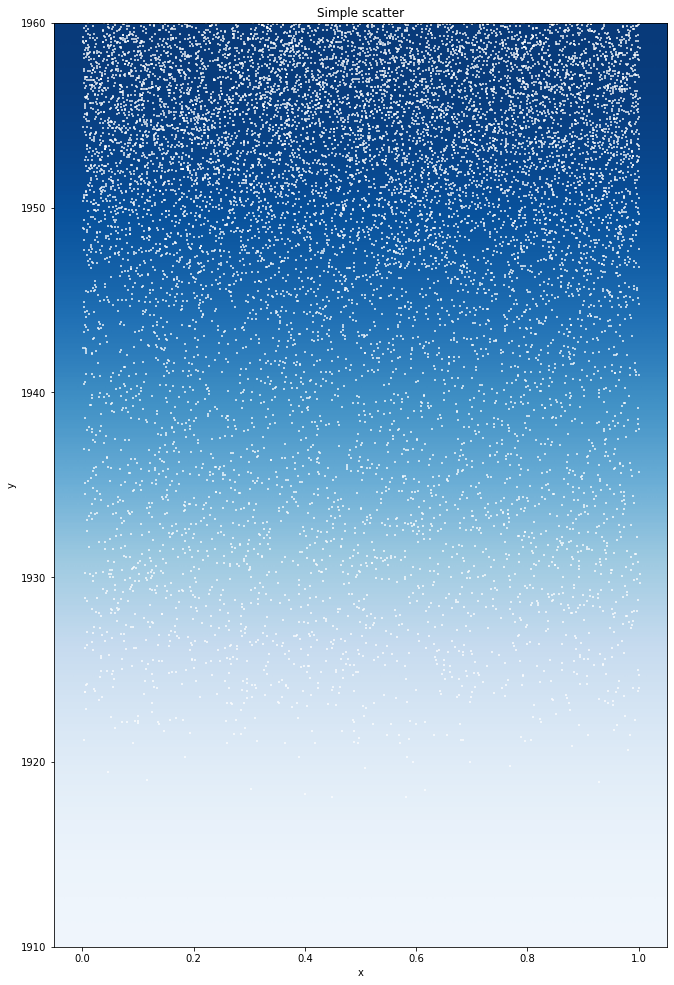

In [76]:

y = testplot['year']
yy = y + np.random.random(len(y))*10

print(len(y))

# x = testplot['pp']*0+random()
x = np.random.random(len(y))

# size = [100,500,100,500]
plt.scatter(x,yy,marker=',',s=1,c='#ffffffaa')


plt.title('Simple scatter')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(1910, 1960)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 17)
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
# ax.set_facecolor('xkcd:salmon')
# ax.set_facecolor((1.0, 0.47, 0.42))
 
plotlim = plt.xlim() + plt.ylim()  
ax.imshow([[1,1],[0,0]], aspect='auto',cmap=plt.cm.Blues, interpolation='bicubic', extent=plotlim)  

plt.draw() 

fig.savefig('test2png.png', dpi=100)

# plt.savefig('ScatterPlot_01.png')
plt.show()

